# 目標: 
 
 1.  更改 Projection 的設定繪製出地球儀圖形



當 "projection" 參數為“ortho"時，所得圖位地球儀截面



當 "projection" 參數為“Mill"時，所得平展位面



2.  查看 resolution / 經緯度座標的繪圖精細度


In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

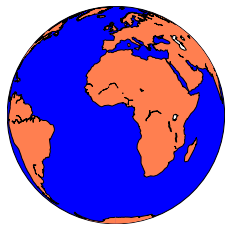

In [9]:
map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 0)

map.drawmapboundary(fill_color = 'blue')
map.fillcontinents(color = 'coral')

map.drawcoastlines()

plt.show()

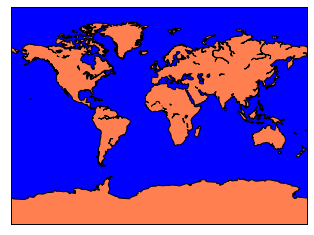

In [11]:
map = Basemap(projection ='mill',lat_0 = 0, lon_0 =0)
#’ortho’指正射投影，後面两個参數是设置中心點


# 给整個地圖上藍色
map.drawmapboundary(fill_color = 'blue')

# 给陸地塗上珊瑚色，湖泊塗上藍色
map.fillcontinents(color = 'coral')

# 畫圖
map.drawcoastlines()

# 顯示结果
plt.show()

# 加入經緯度的座標

1. 獲得它們的實際座標開始, 坐標需要轉換，其中西經和南緯坐標是負值，北緯和東經坐標是正值。
例如，紐約市是北緯40.7127西經74.0059。我們可以在我們的程序中定義這些座標，如：
NYClat, NYClon = 40.7127, -74.0059
 
2. 將這些轉換為要繪製的x和y座標。
xpt, ypt = m(NYClon, NYClat)
現在已經將座標順序翻轉為lon, lat（緯度，經度）。

3. 座標通常以lat, lon順序給出。
然而，在圖形中，lat, long轉換為y, x，我們顯然不需要。在某些時候，必須翻轉它們。

4. 最後，我們可以繪製如下的坐標：
map.plot(xpt, ypt, 'c*', markersize=15)


In [12]:
def draw_map(m, scale=0.2):
      # 繪製一個陰影浮雕的地理圖像
    m.shadedrelief(scale=scale)

    # 經度與緯度將會以字典的形式返回
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # 運用 plt.Line2D 實例設置經緯線
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # 通過迴圈設置所有線條的樣式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
    plt.show()

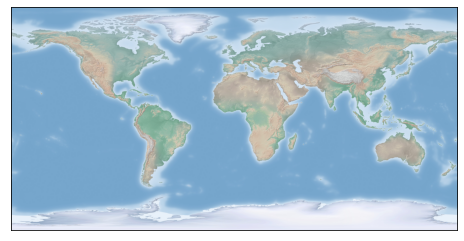

In [15]:
import numpy as np
from itertools import chain

#運用 "itertools" 庫中的 "chain" 模組，可以繪製更接近於生活中所見世界地圖的圖像
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# 繪製一個陰影浮雕的地理圖像
m.shadedrelief(scale=0.2)

plt.show()

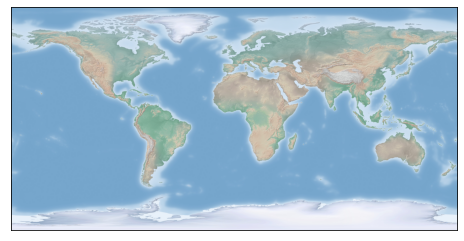

In [16]:
import numpy as np
from itertools import chain

#運用 "itertools" 庫中的 "chain" 模組，可以繪製更接近於生活中所見世界地圖的圖像
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution='f',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# 繪製一個陰影浮雕的地理圖像
m.shadedrelief(scale=0.2)

plt.show()